In [82]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [83]:
import os

# get the current working directory
current_working_directory = os.getcwd()

# print output to the console
print(current_working_directory)

c:\Users\sambh\Desktop\ML-NoteBook


In [84]:
df = pd.read_csv(current_working_directory+"\\Dataset\\Titanic-Dataset\\Titanic-Dataset.csv")
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [85]:
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [86]:
print(df.dtypes)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [87]:
print(df.columns)  # Check all column names


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [88]:
# Convert numeric columns to appropriate types
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')

# Fill missing numeric values
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# Convert 'Sex' to numeric: male=0, female=1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


df['Fare'] = np.log1p(df['Fare'])  # log(1 + Fare)

# Ensure that the expected one-hot columns exist
for col in ['Embarked_C', 'Embarked_Q', 'Embarked_S']:
    if col not in df.columns:
        df[col] = 0

# Select features for the model
features = ['Pclass', 'Age', 'Fare', 'SibSp', 'Parch', 'Sex', 
            'Embarked_C', 'Embarked_Q', 'Embarked_S']

X = df[features].values
y = df['Survived'].values  # Target variable
X,y

(array([[ 3.        , 22.        ,  2.1102132 , ...,  0.        ,
          0.        ,  0.        ],
        [ 1.        , 38.        ,  4.28059312, ...,  0.        ,
          0.        ,  0.        ],
        [ 3.        , 26.        ,  2.18885633, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 3.        , 29.69911765,  3.19663022, ...,  0.        ,
          0.        ,  0.        ],
        [ 1.        , 26.        ,  3.4339872 , ...,  0.        ,
          0.        ,  0.        ],
        [ 3.        , 32.        ,  2.1690537 , ...,  0.        ,
          0.        ,  0.        ]]),
 array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
        1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
   

In [89]:
def train_test_split_manual(X, y, test_size=0.2):
    np.random.seed(42)
    indices = np.random.permutation(len(X))
    test_size = int(len(X) * test_size)
    
    test_idx, train_idx = indices[:test_size], indices[test_size:]
    
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_manual(X, y)
X_test,X_train,y_test,y_train

(array([[ 3.        , 29.69911765,  2.78783441, ...,  0.        ,
          0.        ,  0.        ],
        [ 2.        , 31.        ,  2.44234704, ...,  0.        ,
          0.        ,  0.        ],
        [ 3.        , 20.        ,  2.18885633, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 3.        , 29.69911765,  2.1071783 , ...,  0.        ,
          0.        ,  0.        ],
        [ 3.        , 38.        ,  3.47777255, ...,  0.        ,
          0.        ,  0.        ],
        [ 2.        , 17.        ,  2.44234704, ...,  0.        ,
          0.        ,  0.        ]]),
 array([[ 3.        ,  4.        ,  2.87356464, ...,  0.        ,
          0.        ,  0.        ],
        [ 1.        , 45.5       ,  3.38439026, ...,  0.        ,
          0.        ,  0.        ],
        [ 2.        , 23.        ,  2.63905733, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 3.        , 41.        ,  2.71524426, ...,  

Epoch 0: Loss = 118.6739


Epoch 300: Loss = 5.0908
Epoch 600: Loss = 4.5786
Epoch 900: Loss = 4.0265
Epoch 1200: Loss = 3.5552
Epoch 1500: Loss = 3.2147
Epoch 1800: Loss = 2.9178
Epoch 2100: Loss = 2.6411
Epoch 2400: Loss = 2.3857
Epoch 2700: Loss = 2.1580


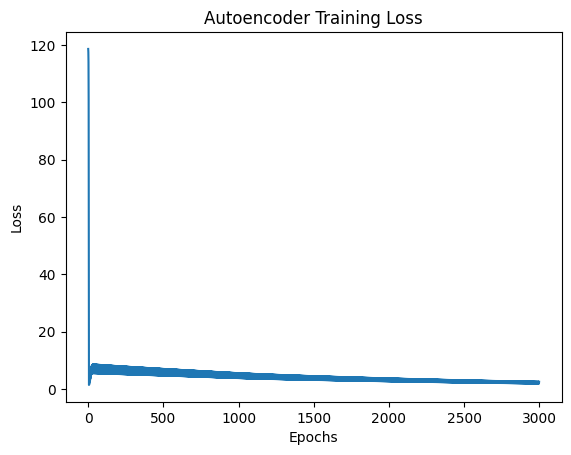

In [90]:
# Sigmoid activation function and its derivative
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_deriv(z):
    s = sigmoid(z)
    return s * (1 - s)
def relu(z):
    return np.maximum(0, z)

def relu_deriv(z):
    return (z > 0).astype(float)

def train_autoencoder(X, hidden_dim=10, activation_fun=None, activation_fun_deriv=None, learning_rate=0.01, epochs=1000):
    n_samples, n_features = X.shape

    if activation_fun is None:
        activation_fun = sigmoid
    if activation_fun_deriv is None:
        activation_fun_deriv = sigmoid_deriv
    
    # Initialize weights and biases for encoder and decoder
    W1 = np.random.randn(n_features, hidden_dim) * 0.01
    b1 = np.zeros((1, hidden_dim))
    W2 = np.random.randn(hidden_dim, n_features) * 0.01
    b2 = np.zeros((1, n_features))
    losses=[]
    
    # Training loop
    for epoch in range(epochs):
        # Forward pass:
        z1 = np.dot(X, W1) + b1           # Encoder linear combination
        a1 = activation_fun(z1)                  # Encoder activation
        z2 = np.dot(a1, W2) + b2          # Decoder linear combination
        a2 = activation_fun(z2)                  # Decoder activation (reconstructed output)
        
        # Compute mean squared error loss (reconstruction error)
        loss = np.mean((X - a2) ** 2)
        losses.append(loss)
        
        # Backpropagation:
        dz2 = (a2 - X) * activation_fun_deriv(z2)         # Gradient at decoder output layer
        dW2 = np.dot(a1.T, dz2) / n_samples
        db2 = np.sum(dz2, axis=0, keepdims=True) / n_samples
        
        da1 = np.dot(dz2, W2.T)                      # Gradient flowing back to the encoder
        dz1 = da1 * activation_fun_deriv(z1)                # Gradient at encoder layer
        dW1 = np.dot(X.T, dz1) / n_samples
        db1 = np.sum(dz1, axis=0, keepdims=True) / n_samples
        
        # Update parameters using gradient descent
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        
        # Optionally print loss every 10% of epochs
        if epoch % (epochs // 10) == 0:
            print("Epoch {}: Loss = {:.4f}".format(epoch, loss))
    
    # Return the trained parameters as a dictionary
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    plt.plot(losses)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Autoencoder Training Loss')
    return parameters

# Train the autoencoder:
parameters = train_autoencoder(X, hidden_dim=20, activation_fun=relu, activation_fun_deriv=relu_deriv, learning_rate=0.001, epochs=3000)


In [91]:
# Testing function for the autoencoder:
def test_autoencoder(X, parameters,activation_fun=None):
    if activation_fun is None:
        activation_fun = sigmoid
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Forward pass through the encoder
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    
    # Forward pass through the decoder
    z2 = np.dot(a1, W2) + b2
    reconstructed_output = activation_fun(z2)
    
    # Compute reconstruction loss (Mean Squared Error)
    loss = np.mean((X - reconstructed_output) ** 2)
    
    return reconstructed_output, loss

# Test the autoencoder
reconstructed, test_loss = test_autoencoder(X_test, parameters,activation_fun=relu)

# Convert loss to percentage
max_value = np.max(X_test)  # Use max value of the dataset to normalize
error_percentage = (test_loss / max_value) * 100

print(f"Test Loss (MSE): {test_loss:.6f}")
print(f"Reconstruction Error: {error_percentage:.2f}%")

# Optionally, inspect a few samples:
for i in range(3):
    print(f"Original:      {X_test[i]}")
    print(f"Reconstructed: {np.round(reconstructed[i], 3)}\n")


Test Loss (MSE): 2.028623
Reconstruction Error: 2.86%
Original:      [ 3.         29.69911765  2.78783441  1.          1.          0.
  0.          0.          0.        ]
Reconstructed: [ 2.978 33.252  3.364  0.737  0.527  0.415  0.     0.     0.   ]

Original:      [ 2.         31.          2.44234704  0.          0.          0.
  0.          0.          0.        ]
Reconstructed: [ 2.19  35.033  2.635  0.     0.074  0.271  0.     0.     0.   ]

Original:      [ 3.         20.          2.18885633  0.          0.          0.
  0.          0.          0.        ]
Reconstructed: [ 2.86  22.565  2.168  0.367  0.213  0.259  0.     0.     0.   ]



# sigmoid vs relu
Reconstruction Error: 163.47% in sigmoid 
Reconstruction Error: 2.86% in relu